In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
data=pd.read_csv("SP500Index_v2.csv")

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(data['Date'], data["Close"])

plt.grid()
plt.title('S&P 500 Index five-minute price dynamics')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fec0ad405e0> (for post_execute):


KeyboardInterrupt: 

In [4]:
data["log_return"] = np.nan

# looping through the dataset and calculating the log return for every five minuets according to the equation from the paper
for i in range(1,len(data["Date"])):
    data.loc[i,"log_return_sqr"] = ((np.log(data.loc[i,"Close"])-np.log(data.loc[i-1,"Close"]))*100)**2
    
    
for i in range(1,len(data["Date"])):
    data.loc[i,"log_return"] = (np.log(data.loc[i,"Close"])-np.log(data.loc[i-1,"Close"]))*100

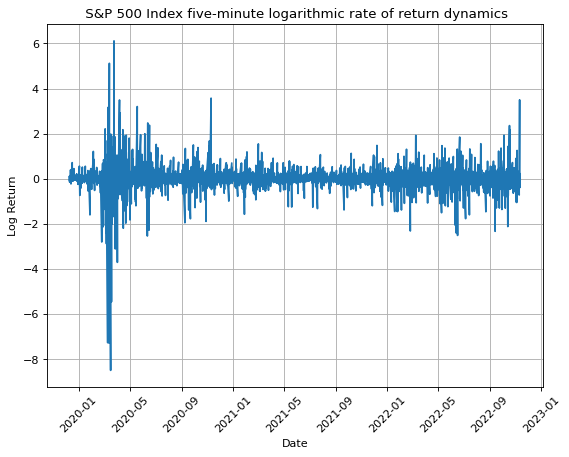

In [5]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(data['Date'], data["log_return"])

plt.grid()
plt.title(' S&P 500 Index five-minute logarithmic rate of return dynamics')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [5]:
data['Day'] = data["Date"].str.split(' ').str[0] # creat a new column by only use the day as the time unit

In [6]:
# DAY
# the dataset is composed by data from every 5 minutes of shock prices
datas=data[["Day","log_return_sqr"]] # selecting the "Day" and "log_return_sqr" column
dayd=datas.groupby(by=["Day"]).sum() # using groupby to sum up the value within the same day

In [7]:
# Week (1-5)

dayd2=dayd.reset_index() # the return of group by will index a column automatically, I reset the index column as normal column here
dayd2["week_log_return_sqr"]=0.0 # set the initial value as a float
dayd2.tail(10)

# looping through the "log_return_sqr" and calculating the weekly log return according to the equation from the paper
for i in range(0,len(dayd2["log_return_sqr"])-4):
    dayd2["week_log_return_sqr"][i]=(dayd2.loc[i:i+4,"log_return_sqr"].sum())/5
    


<ipython-input-7-2f16421a354b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dayd2["week_log_return_sqr"][i]=(dayd2.loc[i:i+4,"log_return_sqr"].sum())/5


In [8]:
# Month

dayd2["month_log_return_sqr"]=0.0 # set the initial value as a float

# looping through the "log_return_sqr" and calculating the monthly log return according to the equation from the paper
for i in range(0,len(dayd2["log_return_sqr"])-20):
    dayd2["month_log_return_sqr"][i]=dayd2.loc[i:i+20,"log_return_sqr"].sum()/21

<ipython-input-8-a8b353d724ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dayd2["month_log_return_sqr"][i]=dayd2.loc[i:i+20,"log_return_sqr"].sum()/21


In [9]:
# Final: droping the last 20 rows
m1=dayd2["month_log_return_sqr"]!=0 # making a mask that including all the values expect 0
RV=dayd2[m1] # the final dataset by saving all the row with vaild values
RV # showing the result

,Day,log_return_sqr,week_log_return_sqr,month_log_return_sqr
0,2019-12-09,0.045404,0.262899,0.231236
1,2019-12-10,0.176594,0.370473,0.246274
2,2019-12-11,0.088090,0.350744,0.244390
3,2019-12-12,0.630203,0.350151,0.244219
4,2019-12-13,0.374203,0.237072,0.223138
...,...,...,...,...
711,2022-10-10,1.491055,3.791561,2.715211
712,2022-10-11,2.392181,4.796303,2.707353
713,2022-10-12,0.746298,5.637882,2.658695
714,2022-10-13,10.838424,5.756028,3.249539


In [ ]:
# plt.figure(figsize=[10,8])
# plt.plot(RV['Day'],RV['log_return_sqr'])

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(data['Day'], data["log_return_sqr"])

# plt.grid()
plt.title(' S&P 500 Index daily RV (volatility) dynamics')
plt.xlabel('Date')
plt.ylabel('Volatility of S&P 500 Index')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [11]:
columns=["Day","log_return_sqr","week_log_return_sqr","month_log_return_sqr"]
RVPlus1=RV[columns]

RVPlus1=RVPlus1.iloc[1:]

RVPlus1.rename(columns = {'Day':'Day', 
                          'log_return_sqr':'log_return_sqr_plus_one',
                          'week_log_return_sqr':'week_log_return_sqr_plus_one',
                          'month_log_return_sqr':'month_log_return_sqr_plus_one'}, inplace = True)

RVPlus1= RVPlus1.iloc[: , 1:]
RV=RV.join(RVPlus1)

RV['week_log_return_sqr_plus_one'] = RV['week_log_return_sqr_plus_one'].shift(-1)
RV['log_return_sqr_plus_one'] = RV['log_return_sqr_plus_one'].shift(-1)
RV['month_log_return_sqr_plus_one'] = RV['month_log_return_sqr_plus_one'].shift(-1)
RV = RV[:-1]
RV.head(10)

,Day,log_return_sqr,week_log_return_sqr,month_log_return_sqr,log_return_sqr_plus_one,week_log_return_sqr_plus_one,month_log_return_sqr_plus_one
0,2019-12-09,0.045404,0.262899,0.231236,0.176594,0.370473,0.246274
1,2019-12-10,0.176594,0.370473,0.246274,0.088090,0.350744,0.244390
2,2019-12-11,0.088090,0.350744,0.244390,0.630203,0.350151,0.244219
3,2019-12-12,0.630203,0.350151,0.244219,0.374203,0.237072,0.223138
4,2019-12-13,0.374203,0.237072,0.223138,0.583274,0.210662,0.213302
5,2019-12-16,0.583274,0.210662,0.213302,0.077952,0.101666,0.202749
6,2019-12-17,0.077952,0.101666,0.202749,0.085122,0.089531,0.204643
7,2019-12-18,0.085122,0.089531,0.204643,0.064809,0.087548,0.209901
8,2019-12-19,0.064809,0.087548,0.209901,0.242155,0.100733,0.217742
9,2019-12-20,0.242155,0.100733,0.217742,0.038295,0.095584,0.227161


In [17]:
def mul_regress(X,y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    
    return results

In [55]:
X = RV[['log_return_sqr','week_log_return_sqr','month_log_return_sqr']] 
y = RV['log_return_sqr_plus_one'] 

Rvd_regress = mul_regress(X,y)
Rvd_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log_return_sqr_plus_one   R-squared:                       0.710
Model:                                 OLS   Adj. R-squared:                  0.709
Method:                      Least Squares   F-statistic:                     581.3
Date:                     Mon, 28 Nov 2022   Prob (F-statistic):          8.69e-191
Time:                             22:12:11   Log-Likelihood:                -1946.8
No. Observations:                      715   AIC:                             3902.
Df Residuals:                          711   BIC:                             3920.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1765      0.155      1.135      0.257      -0.129       0.482
log_return_sqr          -0.2791      0.035     -7.869      0.000      -0.349      -0.209
week_log_return_sqr      1.3701      0.052     26.155      0.000       1.267       1.473
month_log_return_sqr    -0.1719      0.044     -3.883      0.000      -0.259      -0.085
==============================================================================
Omnibus:                      345.646   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           449043.339
Skew:                           0.472   Prob(JB):                         0.00
Kurtosis:                     125.768   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

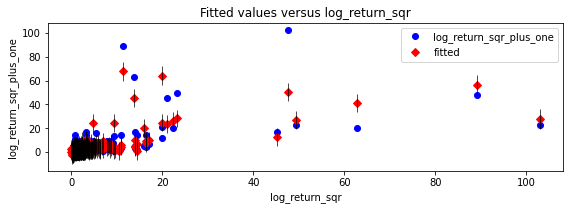

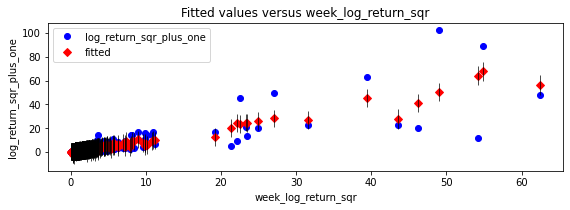

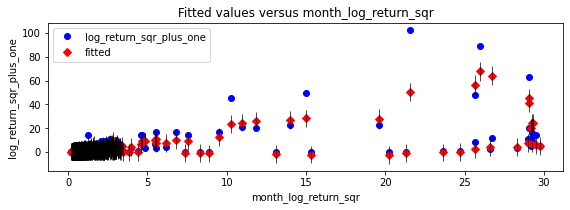

In [56]:
fig1, ax1 = plt.subplots(figsize=(8,3))
fig1 = sm.graphics.plot_fit(Rvd_regress, "log_return_sqr", ax=ax1)
fig1.tight_layout(pad=1.0)

fig2, ax2 = plt.subplots(figsize=(8,3))
fig2 = sm.graphics.plot_fit(Rvd_regress, "week_log_return_sqr", ax=ax2)
fig2.tight_layout(pad=1.0)

fig3, ax3 = plt.subplots(figsize=(8,3))
fig3 = sm.graphics.plot_fit(Rvd_regress, "month_log_return_sqr", ax=ax3)
fig3.tight_layout(pad=1.0)


In [57]:
X1 = RV[['log_return_sqr','week_log_return_sqr','month_log_return_sqr']] 
y1 = RV['week_log_return_sqr_plus_one'] 

Rvw_regress = mul_regress(X1,y1)
Rvw_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     week_log_return_sqr_plus_one   R-squared:                       0.975
Model:                                      OLS   Adj. R-squared:                  0.974
Method:                           Least Squares   F-statistic:                     9079.
Date:                          Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                                  22:12:13   Log-Likelihood:                -942.71
No. Observations:                           715   AIC:                             1893.
Df Residuals:                               711   BIC:                             1912.
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0372      0.038     -0.974      0.330      -0.112       0.038
log_return_sqr          -0.2264      0.009    -25.999      0.000      -0.244      -0.209
week_log_return_sqr      1.1298      0.013     87.848      0.000       1.105       1.155
month_log_return_sqr     0.1127      0.011     10.369      0.000       0.091       0.134
==============================================================================
Omnibus:                     1033.748   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373905.736
Skew:                           7.756   Prob(JB):                         0.00
Kurtosis:                     113.951   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

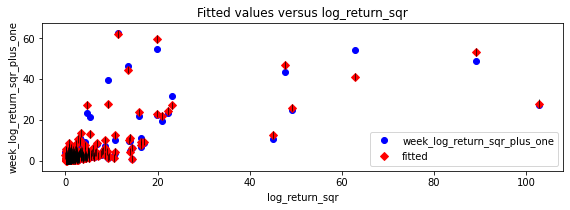

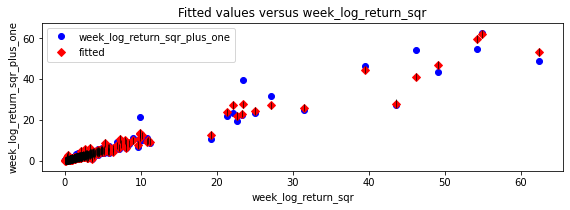

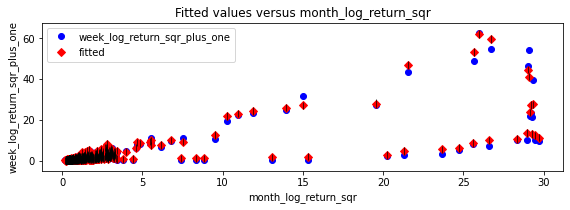

In [58]:
fig1, ax1 = plt.subplots(figsize=(8,3))
fig1 = sm.graphics.plot_fit(Rvw_regress, "log_return_sqr", ax=ax1)
fig1.tight_layout(pad=1.0)

fig2, ax2 = plt.subplots(figsize=(8,3))
fig2 = sm.graphics.plot_fit(Rvw_regress, "week_log_return_sqr", ax=ax2)
fig2.tight_layout(pad=1.0)

fig3, ax3 = plt.subplots(figsize=(8,3))
fig3 = sm.graphics.plot_fit(Rvw_regress, "month_log_return_sqr", ax=ax3)
fig3.tight_layout(pad=1.0)


In [59]:
X2 = RV[['log_return_sqr','week_log_return_sqr','month_log_return_sqr']] 
y2 = RV['month_log_return_sqr_plus_one'] 

Rvm_regress = mul_regress(X2,y2)
Rvm_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     month_log_return_sqr_plus_one   R-squared:                       0.996
Model:                                       OLS   Adj. R-squared:                  0.996
Method:                            Least Squares   F-statistic:                 6.418e+04
Date:                           Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                                   22:12:15   Log-Likelihood:                -89.431
No. Observations:                            715   AIC:                             186.9
Df Residuals:                                711   BIC:                             205.2
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0415      0.012      3.589      0.000       0.019       0.064
log_return_sqr          -0.0424      0.003    -16.056      0.000      -0.048      -0.037
week_log_return_sqr     -0.0305      0.004     -7.829      0.000      -0.038      -0.023
month_log_return_sqr     1.0555      0.003    320.395      0.000       1.049       1.062
==============================================================================
Omnibus:                     1135.980   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           483583.949
Skew:                           9.357   Prob(JB):                         0.00
Kurtosis:                     129.024   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

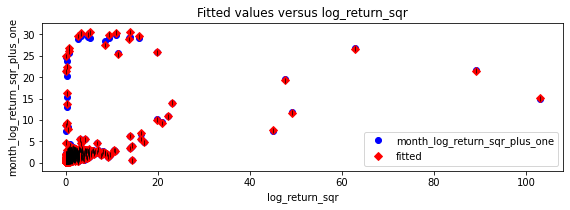

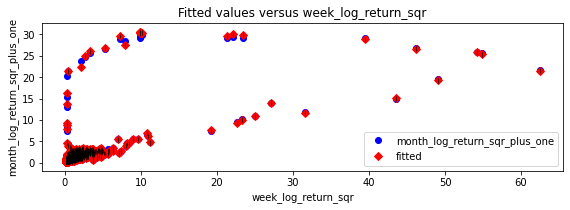

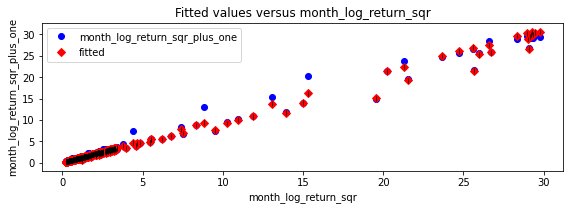

In [60]:
fig1, ax1 = plt.subplots(figsize=(8,3))
fig1 = sm.graphics.plot_fit(Rvm_regress, "log_return_sqr", ax=ax1)
fig1.tight_layout(pad=1.0)

fig2, ax2 = plt.subplots(figsize=(8,3))
fig2 = sm.graphics.plot_fit(Rvm_regress, "week_log_return_sqr", ax=ax2)
fig2.tight_layout(pad=1.0)

fig3, ax3 = plt.subplots(figsize=(8,3))
fig3 = sm.graphics.plot_fit(Rvm_regress, "month_log_return_sqr", ax=ax3)
fig3.tight_layout(pad=1.0)


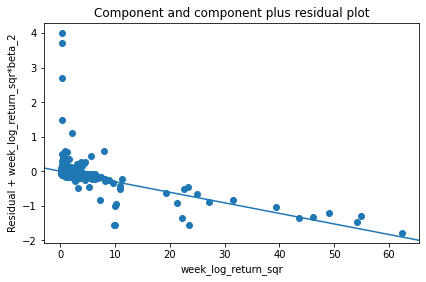

In [61]:
fig = sm.graphics.plot_ccpr(Rvm_regress, "week_log_return_sqr")
fig.tight_layout(pad=1.0)

